Pré-processamento de Dados

Visto que atualmente atuo no ramo da educação, busquei conectar a pós-graduação com o meu trabalho por meio de uma análise exploratória do cenário da educação. O principal questionamento para o trabalho é sobre o impacto da pandemia no modelo de ensino. Para isso, levantei os microdados da edução superior, disponibilizados pelo INPEP (Instituto Nacional de Estudos e Pesquisas Educacionais) de 2018 a 2022 (relatório mais recente).
Fonte: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/censo-da-educacao-superior
Link Drive com Datasets: https://drive.google.com/drive/folders/1bkpN75-O3dspPwZ4P4-McJSYyfW75wUP?usp=sharing

In [1]:
!pip install seaborn

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_2018 = pd.read_csv('C:\\Users\\ANA GABLIELA\\Documents\\Python Scripts\\PUC\\Análise exploratória\\MICRODADOS_CADASTRO_CURSOS_2018.csv', sep = ';', encoding='ISO-8859-1', low_memory = False)
base_2019 = pd.read_csv('C:\\Users\\ANA GABLIELA\\Documents\\Python Scripts\\PUC\\Análise exploratória\\MICRODADOS_CADASTRO_CURSOS_2019.csv', sep = ';', encoding='ISO-8859-1', low_memory = False)
base_2020 = pd.read_csv('C:\\Users\\ANA GABLIELA\\Documents\\Python Scripts\\PUC\\Análise exploratória\\MICRODADOS_CADASTRO_CURSOS_2020.csv', sep = ';', encoding='ISO-8859-1', low_memory = False)
base_2021 = pd.read_csv('C:\\Users\\ANA GABLIELA\\Documents\\Python Scripts\\PUC\\Análise exploratória\\MICRODADOS_CADASTRO_CURSOS_2021.csv', sep = ';', encoding='ISO-8859-1', low_memory = False)
base_2022 = pd.read_csv('C:\\Users\\ANA GABLIELA\\Documents\\Python Scripts\\PUC\\Análise exploratória\\MICRODADOS_CADASTRO_CURSOS_2022.csv', sep = ';', encoding='ISO-8859-1', low_memory = False)

In [4]:
lista_bases = [base_2018, base_2019, base_2020, base_2021, base_2022]
base_empilhada = pd.concat(lista_bases, ignore_index = True)

In [5]:
lista_colunas = base_empilhada.columns.tolist()
print(lista_colunas)


['NU_ANO_CENSO', 'NO_REGIAO', 'CO_REGIAO', 'NO_UF', 'SG_UF', 'CO_UF', 'NO_MUNICIPIO', 'CO_MUNICIPIO', 'IN_CAPITAL', 'TP_DIMENSAO', 'TP_ORGANIZACAO_ACADEMICA', 'TP_CATEGORIA_ADMINISTRATIVA', 'TP_REDE', 'CO_IES', 'NO_CURSO', 'CO_CURSO', 'NO_CINE_ROTULO', 'CO_CINE_ROTULO', 'CO_CINE_AREA_GERAL', 'NO_CINE_AREA_GERAL', 'CO_CINE_AREA_ESPECIFICA', 'NO_CINE_AREA_ESPECIFICA', 'CO_CINE_AREA_DETALHADA', 'NO_CINE_AREA_DETALHADA', 'TP_GRAU_ACADEMICO', 'IN_GRATUITO', 'TP_MODALIDADE_ENSINO', 'TP_NIVEL_ACADEMICO', 'QT_CURSO', 'QT_VG_TOTAL', 'QT_VG_TOTAL_DIURNO', 'QT_VG_TOTAL_NOTURNO', 'QT_VG_TOTAL_EAD', 'QT_VG_NOVA', 'QT_VG_PROC_SELETIVO', 'QT_VG_REMANESC', 'QT_VG_PROG_ESPECIAL', 'QT_INSCRITO_TOTAL', 'QT_INSCRITO_TOTAL_DIURNO', 'QT_INSCRITO_TOTAL_NOTURNO', 'QT_INSCRITO_TOTAL_EAD', 'QT_INSC_VG_NOVA', 'QT_INSC_PROC_SELETIVO', 'QT_INSC_VG_REMANESC', 'QT_INSC_VG_PROG_ESPECIAL', 'QT_ING', 'QT_ING_FEM', 'QT_ING_MASC', 'QT_ING_DIURNO', 'QT_ING_NOTURNO', 'QT_ING_VG_NOVA', 'QT_ING_VESTIBULAR', 'QT_ING_ENEM', 'Q

In [47]:
base_empilhada2 = base_empilhada[['NU_ANO_CENSO','NO_REGIAO','NO_UF','CO_IES','TP_CATEGORIA_ADMINISTRATIVA','TP_MODALIDADE_ENSINO', 'NO_CURSO', 'QT_ING', 'QT_ING_FEM', 'QT_ING_MASC']]

In [48]:
base_empilhada2.isnull().sum()

NU_ANO_CENSO                       0
NO_REGIAO                      31924
NO_UF                          31924
CO_IES                             0
TP_CATEGORIA_ADMINISTRATIVA        0
TP_MODALIDADE_ENSINO               0
NO_CURSO                           0
QT_ING                          7711
QT_ING_FEM                      7711
QT_ING_MASC                     7711
dtype: int64

In [50]:
df_filtrado = base_empilhada2[(base_empilhada2['QT_ING'].isnull())]
df_filtrado

,NU_ANO_CENSO,NO_REGIAO,NO_UF,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_MODALIDADE_ENSINO,NO_CURSO,QT_ING,QT_ING_FEM,QT_ING_MASC
179625,2018,NaN,NaN,1,1,2,ADMINISTRAÇÃO,NaN,NaN,NaN
179626,2018,NaN,NaN,1,1,2,ADMINISTRAÇÃO PÚBLICA,NaN,NaN,NaN
179627,2018,NaN,NaN,1,1,2,CIÊNCIAS NATURAIS E MATEMÁTICA,NaN,NaN,NaN
179628,2018,NaN,NaN,1,1,2,LETRAS - PORTUGUÊS E ESPANHOL,NaN,NaN,NaN
179629,2018,NaN,NaN,1,1,2,LETRAS - PORTUGUÊS E INGLÊS,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
435793,2019,NaN,NaN,19252,4,2,GESTÃO DE RECURSOS HUMANOS,NaN,NaN,NaN
435794,2019,NaN,NaN,19512,4,2,ADMINISTRAÇÃO,NaN,NaN,NaN
435795,2019,NaN,NaN,19512,4,2,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,NaN,NaN,NaN
435796,2019,NaN,NaN,19512,4,2,CIÊNCIAS CONTÁBEIS,NaN,NaN,NaN


In [51]:
#Visto que que as linhas que possuem QT_ING nulo também não apresentam outras informações. Com isso, foram retiradas do dataset
df_sem_nulos = base_empilhada2.dropna(subset=['QT_ING'])
df_sem_nulos.isnull().sum()

NU_ANO_CENSO                       0
NO_REGIAO                      24213
NO_UF                          24213
CO_IES                             0
TP_CATEGORIA_ADMINISTRATIVA        0
TP_MODALIDADE_ENSINO               0
NO_CURSO                           0
QT_ING                             0
QT_ING_FEM                         0
QT_ING_MASC                        0
dtype: int64

In [53]:
df_filtrado2 = df_sem_nulos[(df_sem_nulos['NO_REGIAO'].isnull()) & (df_sem_nulos['TP_MODALIDADE_ENSINO'] == 1)]
df_filtrado2

,NU_ANO_CENSO,NO_REGIAO,NO_UF,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_MODALIDADE_ENSINO,NO_CURSO,QT_ING,QT_ING_FEM,QT_ING_MASC


In [54]:
#Como todas as linhas que possuem 'NO_REGIAO', 'NO_UF' E 'NO_MUNICIPIO' nulos representam os cursos online (TP_MODALIDADE_ENSINO = 1), substituí por 0
df_sem_nulos[['NO_REGIAO', 'NO_UF']] = df_sem_nulos[['NO_REGIAO', 'NO_UF']].fillna(0)
df_sem_nulos.isnull().sum()

NU_ANO_CENSO                   0
NO_REGIAO                      0
NO_UF                          0
CO_IES                         0
TP_CATEGORIA_ADMINISTRATIVA    0
TP_MODALIDADE_ENSINO           0
NO_CURSO                       0
QT_ING                         0
QT_ING_FEM                     0
QT_ING_MASC                    0
dtype: int64

In [55]:
df_mvp = df_sem_nulos

In [56]:
df_mvp

,NU_ANO_CENSO,NO_REGIAO,NO_UF,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_MODALIDADE_ENSINO,NO_CURSO,QT_ING,QT_ING_FEM,QT_ING_MASC
0,2018,Norte,Rondônia,699,1,1,ENGENHARIA DE ALIMENTOS,11.0,10.0,1.0
1,2018,Norte,Rondônia,699,1,1,PEDAGOGIA,42.0,33.0,9.0
2,2018,Norte,Rondônia,1540,5,1,ADMINISTRAÇÃO,49.0,24.0,25.0
3,2018,Norte,Rondônia,1540,5,1,CIÊNCIAS CONTÁBEIS,29.0,15.0,14.0
4,2018,Norte,Rondônia,1540,5,1,DIREITO,102.0,52.0,50.0
...,...,...,...,...,...,...,...,...,...,...
1798522,2022,Sul,Santa Catarina,953,5,2,Gestão Da Tecnologia Da Informação,0.0,0.0,0.0
1798523,2022,Sul,Santa Catarina,953,5,2,Gestão Pública,0.0,0.0,0.0
1798524,2022,Sul,Santa Catarina,953,5,2,Letras - Língua Portuguesa,1.0,1.0,0.0
1798525,2022,Sul,Santa Catarina,953,5,2,Música,0.0,0.0,0.0


Análise Exploratória

In [57]:
df_mvp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1790816 entries, 0 to 1798526
Data columns (total 10 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   NU_ANO_CENSO                 int64  
 1   NO_REGIAO                    object 
 2   NO_UF                        object 
 3   CO_IES                       int64  
 4   TP_CATEGORIA_ADMINISTRATIVA  int64  
 5   TP_MODALIDADE_ENSINO         int64  
 6   NO_CURSO                     object 
 7   QT_ING                       float64
 8   QT_ING_FEM                   float64
 9   QT_ING_MASC                  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 150.3+ MB


In [58]:
df_mvp.head(10)

,NU_ANO_CENSO,NO_REGIAO,NO_UF,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_MODALIDADE_ENSINO,NO_CURSO,QT_ING,QT_ING_FEM,QT_ING_MASC
0,2018,Norte,Rondônia,699,1,1,ENGENHARIA DE ALIMENTOS,11.0,10.0,1.0
1,2018,Norte,Rondônia,699,1,1,PEDAGOGIA,42.0,33.0,9.0
2,2018,Norte,Rondônia,1540,5,1,ADMINISTRAÇÃO,49.0,24.0,25.0
3,2018,Norte,Rondônia,1540,5,1,CIÊNCIAS CONTÁBEIS,29.0,15.0,14.0
4,2018,Norte,Rondônia,1540,5,1,DIREITO,102.0,52.0,50.0
5,2018,Norte,Rondônia,1540,5,1,ENFERMAGEM,54.0,45.0,9.0
6,2018,Norte,Rondônia,1540,5,1,FARMÁCIA,45.0,35.0,10.0
7,2018,Norte,Rondônia,1540,5,1,PSICOLOGIA,10.0,7.0,3.0
8,2018,Norte,Rondônia,1540,5,1,SISTEMAS PARA INTERNET,0.0,0.0,0.0
9,2018,Norte,Rondônia,4613,4,1,ADMINISTRAÇÃO,28.0,11.0,17.0


In [59]:
df_mvp.tail(10)

,NU_ANO_CENSO,NO_REGIAO,NO_UF,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_MODALIDADE_ENSINO,NO_CURSO,QT_ING,QT_ING_FEM,QT_ING_MASC
1798517,2022,Sul,Santa Catarina,3649,4,2,Serviços Jurídicos E Notariais,0.0,0.0,0.0
1798518,2022,Sul,Santa Catarina,953,5,2,Administração,6.0,4.0,2.0
1798519,2022,Sul,Santa Catarina,953,5,2,Artes Visuais,0.0,0.0,0.0
1798520,2022,Sul,Santa Catarina,953,5,2,Ciências Contábeis,0.0,0.0,0.0
1798521,2022,Sul,Santa Catarina,953,5,2,Geografia,0.0,0.0,0.0
1798522,2022,Sul,Santa Catarina,953,5,2,Gestão Da Tecnologia Da Informação,0.0,0.0,0.0
1798523,2022,Sul,Santa Catarina,953,5,2,Gestão Pública,0.0,0.0,0.0
1798524,2022,Sul,Santa Catarina,953,5,2,Letras - Língua Portuguesa,1.0,1.0,0.0
1798525,2022,Sul,Santa Catarina,953,5,2,Música,0.0,0.0,0.0
1798526,2022,Sul,Santa Catarina,953,5,2,Pedagogia,3.0,2.0,1.0


In [60]:
# É possível observar que os últimos itens da coluna NO_CURSO estão em mínusculo. A fim de padronizar, transformei todos os itens da coluna 'NO_CURSO' em maiúsculo
df_mvp['NO_CURSO'] = df_mvp['NO_CURSO'].str.upper()

In [61]:
df_mvp.corr(method = 'pearson')

,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_MODALIDADE_ENSINO,QT_ING,QT_ING_FEM,QT_ING_MASC
NU_ANO_CENSO,1.000000,0.017119,0.014072,0.135420,-0.083372,-0.065173,-0.090095
CO_IES,0.017119,1.000000,-0.130753,-0.192173,0.042022,0.032802,0.045485
TP_CATEGORIA_ADMINISTRATIVA,0.014072,-0.130753,1.000000,0.234612,-0.082568,-0.054288,-0.105347
TP_MODALIDADE_ENSINO,0.135420,-0.192173,0.234612,1.000000,-0.333526,-0.271780,-0.343040
QT_ING,-0.083372,0.042022,-0.082568,-0.333526,1.000000,0.937180,0.836285
QT_ING_FEM,-0.065173,0.032802,-0.054288,-0.271780,0.937180,1.000000,0.592480
QT_ING_MASC,-0.090095,0.045485,-0.105347,-0.343040,0.836285,0.592480,1.000000


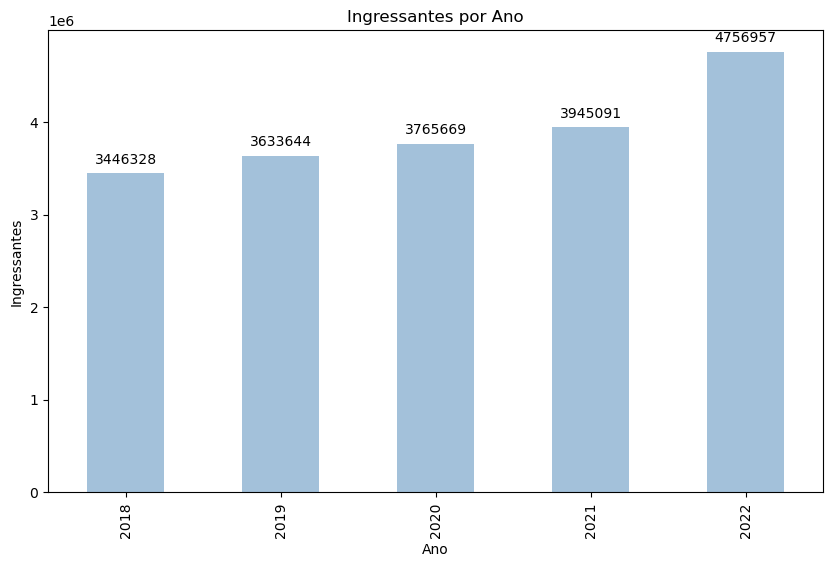

In [62]:
# Agrupar por 'ANO' e somar os valores de 'QT_ING'
soma_por_ano = df_mvp.groupby('NU_ANO_CENSO')['QT_ING'].sum()

# Plotar o gráfico de barras
ax = soma_por_ano.plot(kind='bar', figsize=(10, 6), color = '#A3C1DA')

# Adicionar título e rótulos
plt.title('Ingressantes por Ano')
plt.xlabel('Ano')
plt.ylabel('Ingressantes')

# Adicionar rótulos de dados acima de cada barra
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), textcoords='offset points')

plt.show()

É possível observar o crescimento de ingressantes no ensino superior, principalmente de 2021 para 2022.

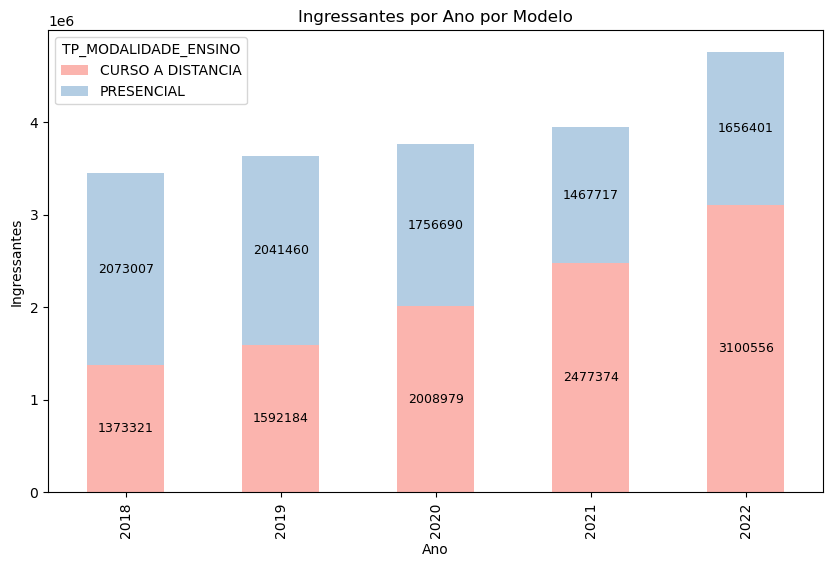

In [63]:
# Alterando os valores de TP_MODALIDADE_ENSINO para os rótulos desejados
df_mvp['TP_MODALIDADE_ENSINO'] = df_mvp['TP_MODALIDADE_ENSINO'].replace({1: 'PRESENCIAL', 2: 'CURSO A DISTANCIA'})

# Criar a tabela pivô
soma_por_ano_dimensao = df_mvp.pivot_table(values='QT_ING', 
                                           index='NU_ANO_CENSO', 
                                           columns='TP_MODALIDADE_ENSINO', 
                                           aggfunc='sum')

# Definir a paleta de cores
colors = sns.set_palette("Pastel1")

# Plotar o gráfico de barras empilhadas
ax = soma_por_ano_dimensao.plot(kind='bar', stacked=True, figsize=(10,6), color=colors)

# Adicionar título e rótulos
plt.title('Ingressantes por Ano por Modelo')
plt.xlabel('Ano')
plt.ylabel('Ingressantes')

# Adicionar rótulos de dados acima de cada barra empilhada
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=9, color='black')

plt.show()

É notável a redução da adesão ao modelo presencial de estudos de nível superior a partir de 2020. Em contrapartida, é possível notar o crescimento do modelo de estudos a distância.

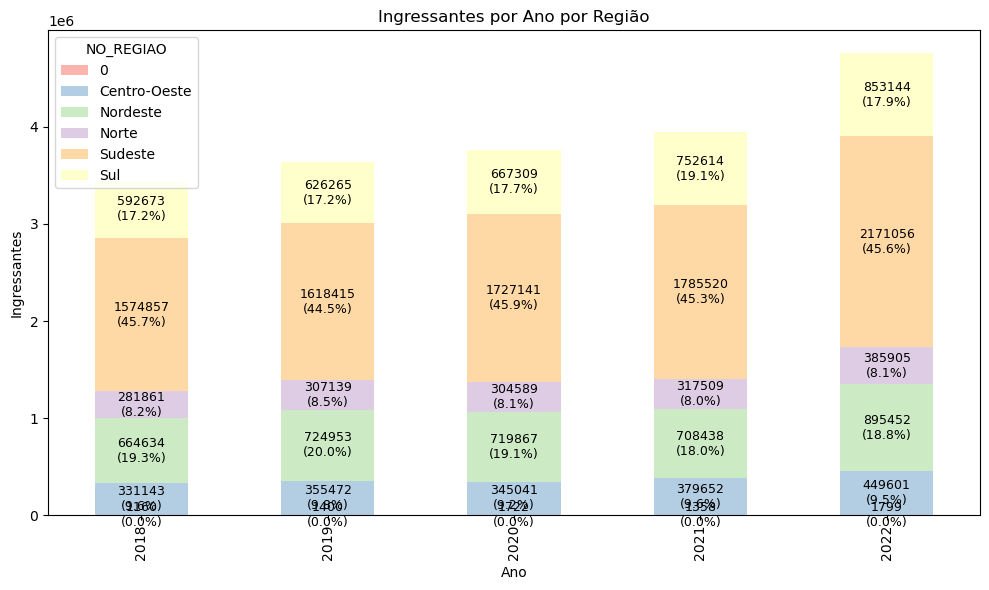

In [77]:
# Criar a tabela pivô
soma_por_ano_dimensao = df_mvp.pivot_table(values='QT_ING', 
                                           index='NU_ANO_CENSO', 
                                           columns='NO_REGIAO', 
                                           aggfunc='sum')

# Definir a paleta de cores
colors = sns.set_palette("Pastel1")

# Plotar o gráfico de barras empilhadas
ax = soma_por_ano_dimensao.plot(kind='bar', stacked=True, figsize=(10,6), color=colors)

# Adicionar título e rótulos
plt.title('Ingressantes por Ano por Região')
plt.xlabel('Ano')
plt.ylabel('Ingressantes')

# Loop por cada barra para adicionar rótulos
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Obter o ano diretamente do índice
    ano = int(ax.get_xticklabels()[int(x)].get_text())

    # Calcular o total de ingressantes para o ano
    total_por_ano = soma_por_ano_dimensao.loc[ano].sum()

    # Calcular o percentual
    percentual = (height / total_por_ano) * 100 if total_por_ano > 0 else 0

    # Adicionar a anotação do valor absoluto e percentual
    if height > 0:
        ax.annotate(f'{int(height)}\n({percentual:.1f}%)', 
                    (x, p.get_y() + height / 2), 
                    ha='center', va='center', 
                    fontsize=9, color='black')

# Ajustar o layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()



Nota-se que a regiao Sudeste concentra a maior quantidade de ingressantes em todos os anos. Ademais, o crescimento de 2021 para 2022 foi muito expressivo em todas as regiões de 2021 para 2022.

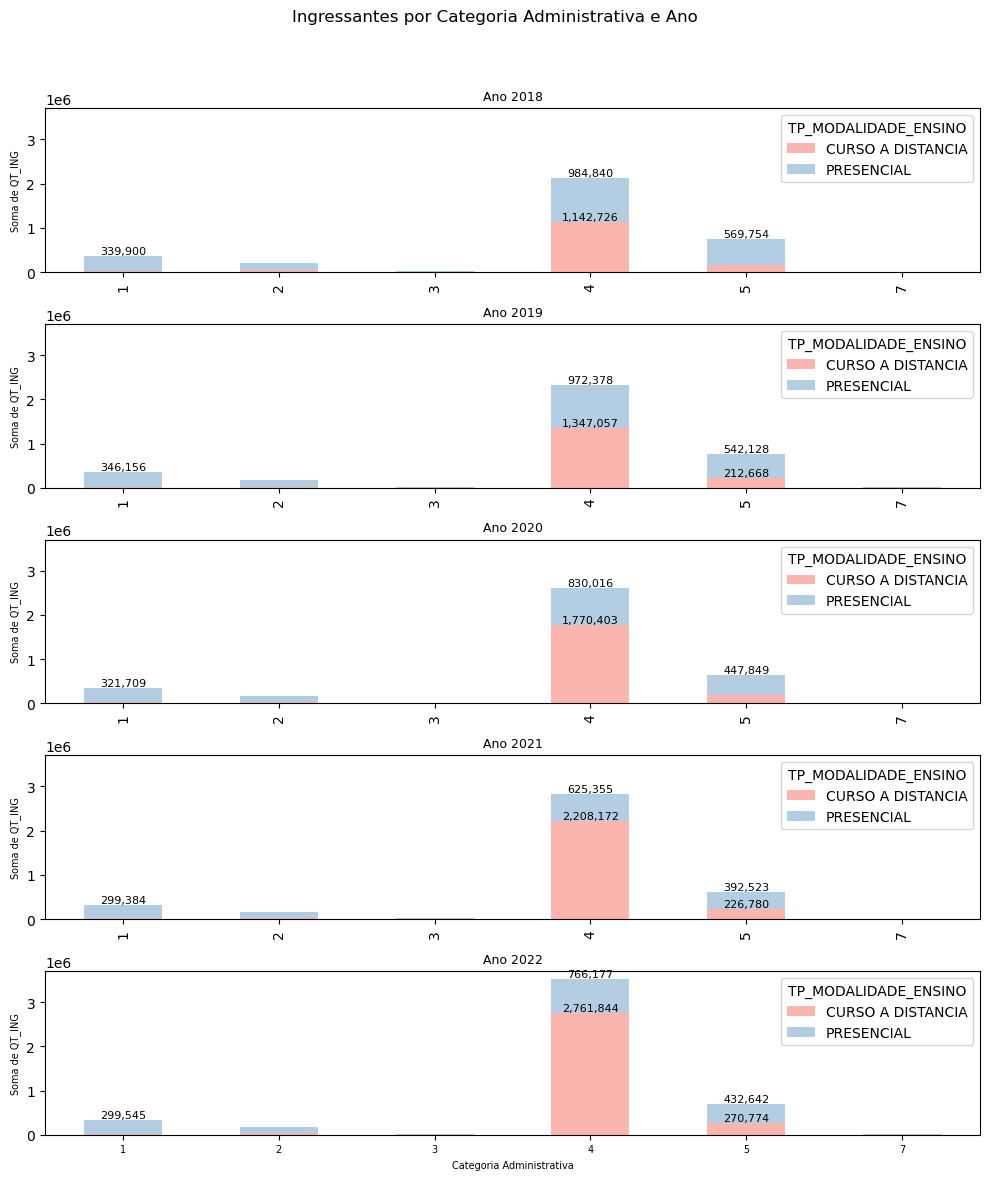

In [64]:
#Agrupar os dados e somar 'QT_ING' por 'NU_ANO_CENSO', 'TP_CATEGORIA_ADMINISTRATIVA' e 'TP_MODALIDADE_ENSINO'
dados_agrupados = df_mvp.pivot_table(values='QT_ING', 
                                     index='TP_CATEGORIA_ADMINISTRATIVA', 
                                     columns=['NU_ANO_CENSO', 'TP_MODALIDADE_ENSINO'], 
                                     aggfunc='sum')

anos = [2018, 2019, 2020, 2021, 2022]

# Criar subplots com 5 linhas, sendo uma para cada ano
fig, axes = plt.subplots(nrows=len(anos), ncols=1, figsize=(10, 12), sharey=True)

# Definir paleta de cores
sns.set_palette("Pastel1")

# Função auxiliar para plotar os gráficos em cada eixo
def plot_por_ano(ano, ax):
    # Selecionar as colunas correspondentes ao ano específico
    dados_por_ano = dados_agrupados[ano]
    
    # Plotar gráfico de barras empilhadas
    dados_por_ano.plot(kind='bar', stacked=True, ax=ax)

    # Configurações de título e eixos
    ax.set_title(f'Ano {ano}', fontsize=9)
    ax.set_ylabel('Soma de QT_ING', fontsize=7)

    # Só adicionar rótulos no eixo X na última subplot
    if ax == axes[-1]:
        ax.set_xlabel('Categoria Administrativa', fontsize=7)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=7, ha='center')
    else:
        ax.set_xlabel('')  # Remover o label dos outros gráficos

    # Adicionar rótulos de dados no topo das barras empilhadas
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()

        if height > 200000:  # Mostrar rótulo apenas se maior que 200000
            ax.annotate(f'{int(height):,}', 
                        (x + width / 2, y + height - 2.5),  # Ajuste para ficar mais na base
                        ha='center', va='bottom', 
                        fontsize=8, color='black')

# Plotar os gráficos para cada ano
for i, ano in enumerate(anos):
    plot_por_ano(ano, axes[i])

# Adicionar título geral
fig.suptitle('Ingressantes por Categoria Administrativa e Ano', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar layout para evitar sobreposição do título
plt.show()


Além disso, é notável que o crescimento de alunos ingressantes no ensino superior a distância ocorre em instituições privadas (categoria administrativa = 4).

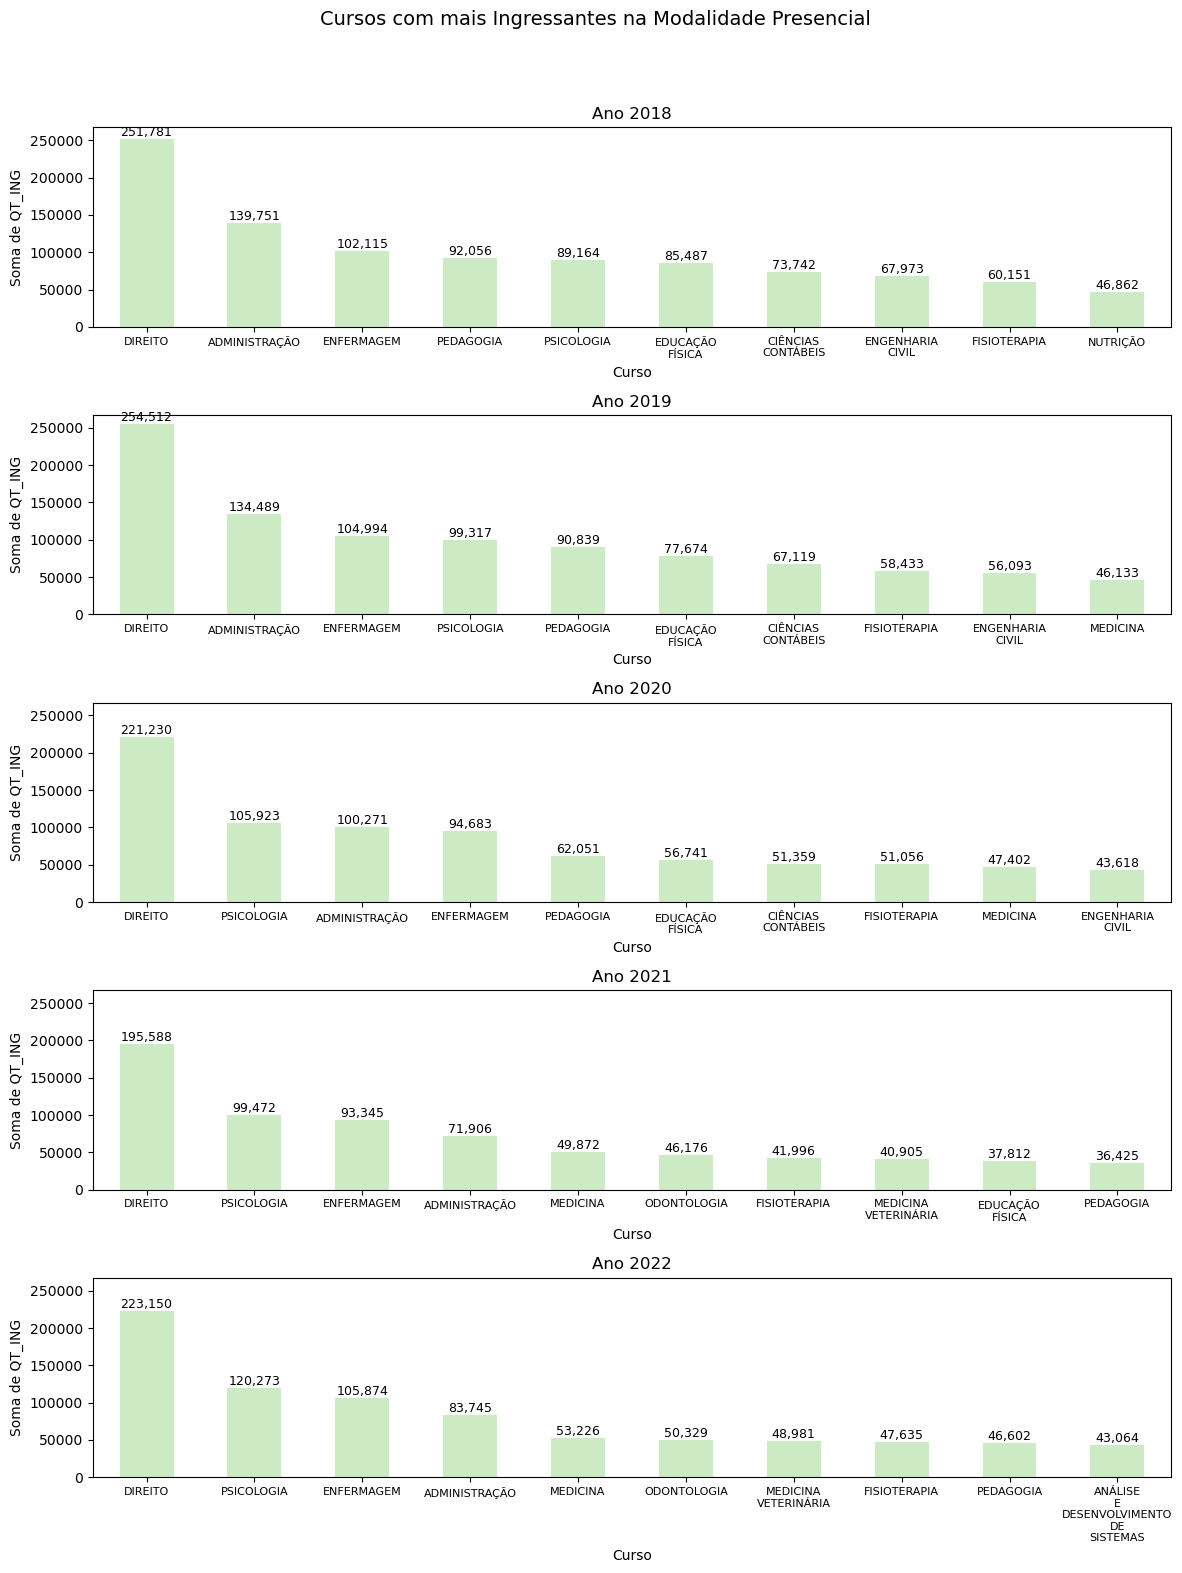

In [68]:
# Filtrar os dados para incluir apenas PRESENCIAL
df_filtrado_ead = df_mvp[df_mvp['TP_MODALIDADE_ENSINO'] == 'PRESENCIAL']

# Agrupar os dados e somar 'QT_ING_MASC' por 'NO_CURSO' e 'NU_ANO_CENSO'
dados_agrupados2 = df_filtrado_ead.pivot_table(values='QT_ING', 
                                           index='NO_CURSO', 
                                           columns='NU_ANO_CENSO', 
                                           aggfunc='sum')

# Definir os anos que queremos plotar
anos = [2018, 2019, 2020, 2021, 2022]

# Criar subplots com 5 linhas, uma para cada ano
fig, axes = plt.subplots(nrows=len(anos), ncols=1, figsize=(12, 16), sharey=True)

# Definir cores para diferentes dimensões
cores = sns.color_palette("Pastel1")
cores = [cores[2]] # Usar apenas a segunda cor da paleta

# Função auxiliar para plotar os gráficos em cada eixo
def plot_por_ano(ano, ax):
    # Selecionar as colunas correspondentes ao ano específico
    dados_por_ano = dados_agrupados2[ano]

    # Filtrar os 10 maiores cursos
    top_10 = dados_por_ano.nlargest(10)

    # Plotar gráfico de barras
    bars = top_10.plot(kind='bar', color=cores, ax=ax)  # Usar a cor definida

    # Configurações de título e eixos
    ax.set_title(f'Ano {ano}', fontsize=12)
    ax.set_xlabel('Curso', fontsize=10)
    ax.set_ylabel('Soma de QT_ING', fontsize=10)
    ax.tick_params(axis='x', labelsize=8)  # Diminuir a fonte do eixo X

    # Ajustar os rótulos do eixo X para quebrar em linhas
    ax.set_xticklabels([label.replace(' ', '\n') for label in top_10.index], rotation=0)

    # Adicionar rótulos de dados nas barras
    for p in bars.patches:
        height = p.get_height()
        if height > 0:  # Apenas adicionar rótulo se houver um valor a ser mostrado
            ax.annotate(f'{int(height):,}', 
                        (p.get_x() + p.get_width() / 2., height),  # Colocar no topo da barra
                        ha='center', va='bottom', 
                        fontsize=9, color='black')

# Plotar os gráficos para cada ano
for i, ano in enumerate(anos):
    plot_por_ano(ano, axes[i])

# Adicionar título geral
fig.suptitle('Cursos com mais Ingressantes na Modalidade Presencial', fontsize=14)

# Ajustar layout para evitar sobreposição de rótulos
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


É notável que até o ano de 2022 Direito foi o curso com maior quantidade de ingressantes na modallidade presencial. Além disso, alguns cursos com grande quantidade de ingressantes reduziu considerávelmente, como Ciências Contábeis. No entanto, é possível notar que as variações não são tão grandes, uma vez que o modelo de ensino não cresceu tanto nos últimos anos.

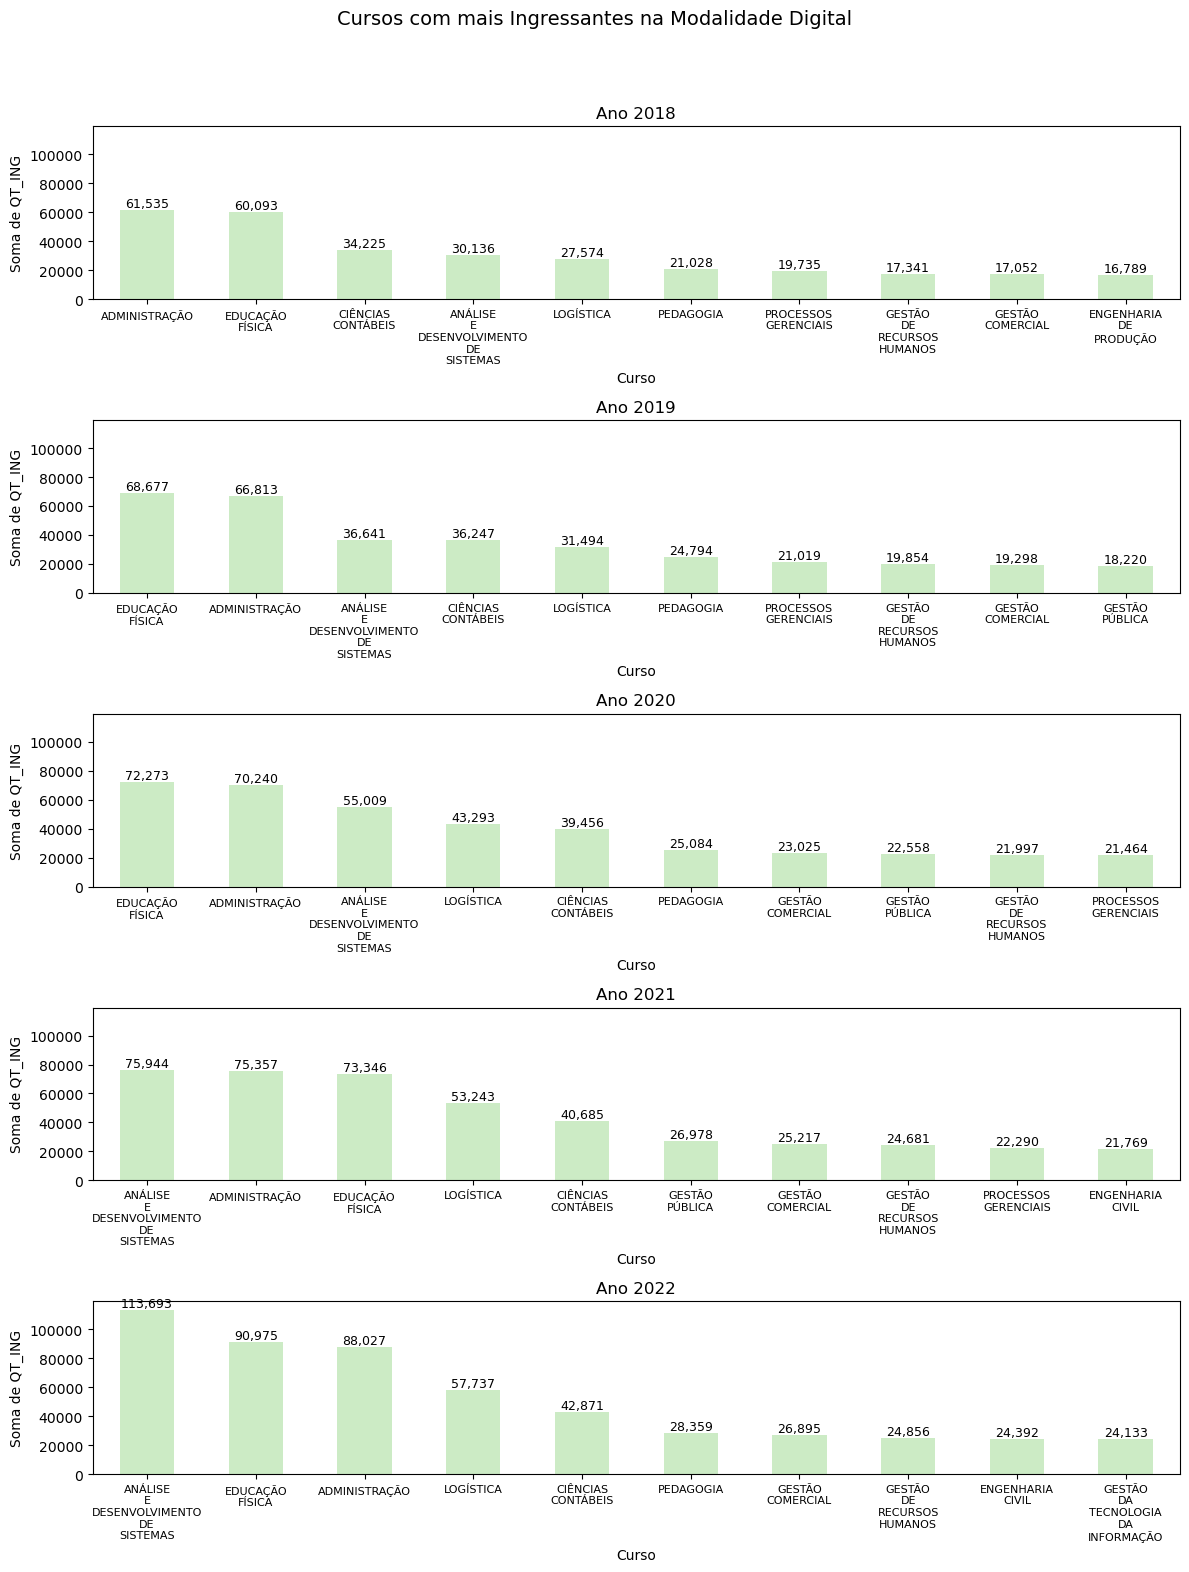

In [69]:
# Filtrar os dados para incluir apenas A DISTÂNCIA
df_filtrado_ead = df_mvp[df_mvp['TP_MODALIDADE_ENSINO'] != 'PRESENCIAL']

# Agrupar os dados e somar 'QT_ING_MASC' por 'NO_CURSO' e 'NU_ANO_CENSO'
dados_agrupados2 = df_filtrado_ead.pivot_table(values='QT_ING_MASC', 
                                           index='NO_CURSO', 
                                           columns='NU_ANO_CENSO', 
                                           aggfunc='sum')

# Definir os anos que queremos plotar
anos = [2018, 2019, 2020, 2021, 2022]

# Criar subplots com 5 linhas, uma para cada ano
fig, axes = plt.subplots(nrows=len(anos), ncols=1, figsize=(12, 16), sharey=True)

# Definir cores para diferentes dimensões
cores = sns.color_palette("Pastel1")
cores = [cores[2]] # Usar apenas a segunda cor da paleta

# Função auxiliar para plotar os gráficos em cada eixo
def plot_por_ano(ano, ax):
    # Selecionar as colunas correspondentes ao ano específico
    dados_por_ano = dados_agrupados2[ano]

    # Filtrar os 10 maiores cursos
    top_10 = dados_por_ano.nlargest(10)

    # Plotar gráfico de barras
    bars = top_10.plot(kind='bar', color=cores, ax=ax)  # Usar a cor definida

    # Configurações de título e eixos
    ax.set_title(f'Ano {ano}', fontsize=12)
    ax.set_xlabel('Curso', fontsize=10)
    ax.set_ylabel('Soma de QT_ING', fontsize=10)
    ax.tick_params(axis='x', labelsize=8)  # Diminuir a fonte do eixo X

    # Ajustar os rótulos do eixo X para quebrar em linhas
    ax.set_xticklabels([label.replace(' ', '\n') for label in top_10.index], rotation=0)

    # Adicionar rótulos de dados nas barras
    for p in bars.patches:
        height = p.get_height()
        if height > 0:  # Apenas adicionar rótulo se houver um valor a ser mostrado
            ax.annotate(f'{int(height):,}', 
                        (p.get_x() + p.get_width() / 2., height),  # Colocar no topo da barra
                        ha='center', va='bottom', 
                        fontsize=9, color='black')

# Plotar os gráficos para cada ano
for i, ano in enumerate(anos):
    plot_por_ano(ano, axes[i])

# Adicionar título geral
fig.suptitle('Cursos com mais Ingressantes na Modalidade Digital', fontsize=14)

# Ajustar layout para evitar sobreposição de rótulos
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


É notável o crescimento dos cursos de Análise e Desenvolvimento de Sistemas e Educação Física no modelo a distância. No entanto, é válido observar que mesmo com o crescimento notável de ingressantes, os ingressantes não são concentrados em alguns cursos como ocorre no modelo presencial, indicando uma maior diversidade de cursos.

In [70]:
# Agrupar os dados e somar 'QT_ING_MASC' por 'NO_CURSO' e 'NU_ANO_CENSO'
dados_agrupados_gênero = df_mvp.pivot_table(values=['QT_ING_MASC','QT_ING_FEM'], 
                                           index='NU_ANO_CENSO',
                                           columns = 'TP_CATEGORIA_ADMINISTRATIVA',
                                           aggfunc='sum')
dados_agrupados_gênero

QT_ING_FEM                                         \
TP_CATEGORIA_ADMINISTRATIVA          1        2        3          4         5   
NU_ANO_CENSO                                                                    
2018                          176994.0  97146.0   9649.0  1223159.0  422161.0   
2019                          176839.0  87963.0   9688.0  1359096.0  434620.0   
2020                          168706.0  83946.0   8356.0  1518032.0  364395.0   
2021                          164695.0  80178.0   8762.0  1698972.0  361673.0   
2022                          167951.0  93725.0  10885.0  2150596.0  413192.0   

                                    QT_ING_MASC                              \
TP_CATEGORIA_ADMINISTRATIVA       7           1        2       3          4   
NU_ANO_CENSO                                                                  
2018                         4151.0    185011.0  97055.0  7720.0   904407.0   
2019                         3927.0    185719.0  84502.0  7580.0   960339.0   
2020                         3849.0    173820.0  79468.0  6128.0  1082387.0   
2021                         2994.0    156064.0  71168.0  6250.0  1134555.0   
2022                         4296.0    154171.0  83510.0  7973.0  1377425.0   

                                               
TP_CATEGORIA_ADMINISTRATIVA         5       7  
NU_ANO_CENSO                                   
2018                         315545.0  3330.0  
2019                         320176.0  3195.0  
2020                         273730.0  2852.0  
2021                         257630.0  2150.0  
2022                         290224.0  3009.0

Pode-se notar a maior representatividade do gênero feminino nas universidades brasileiras, principalmente em universidades privadas (TP_CATEGORIA_ADMINISTRATIVA = 4)

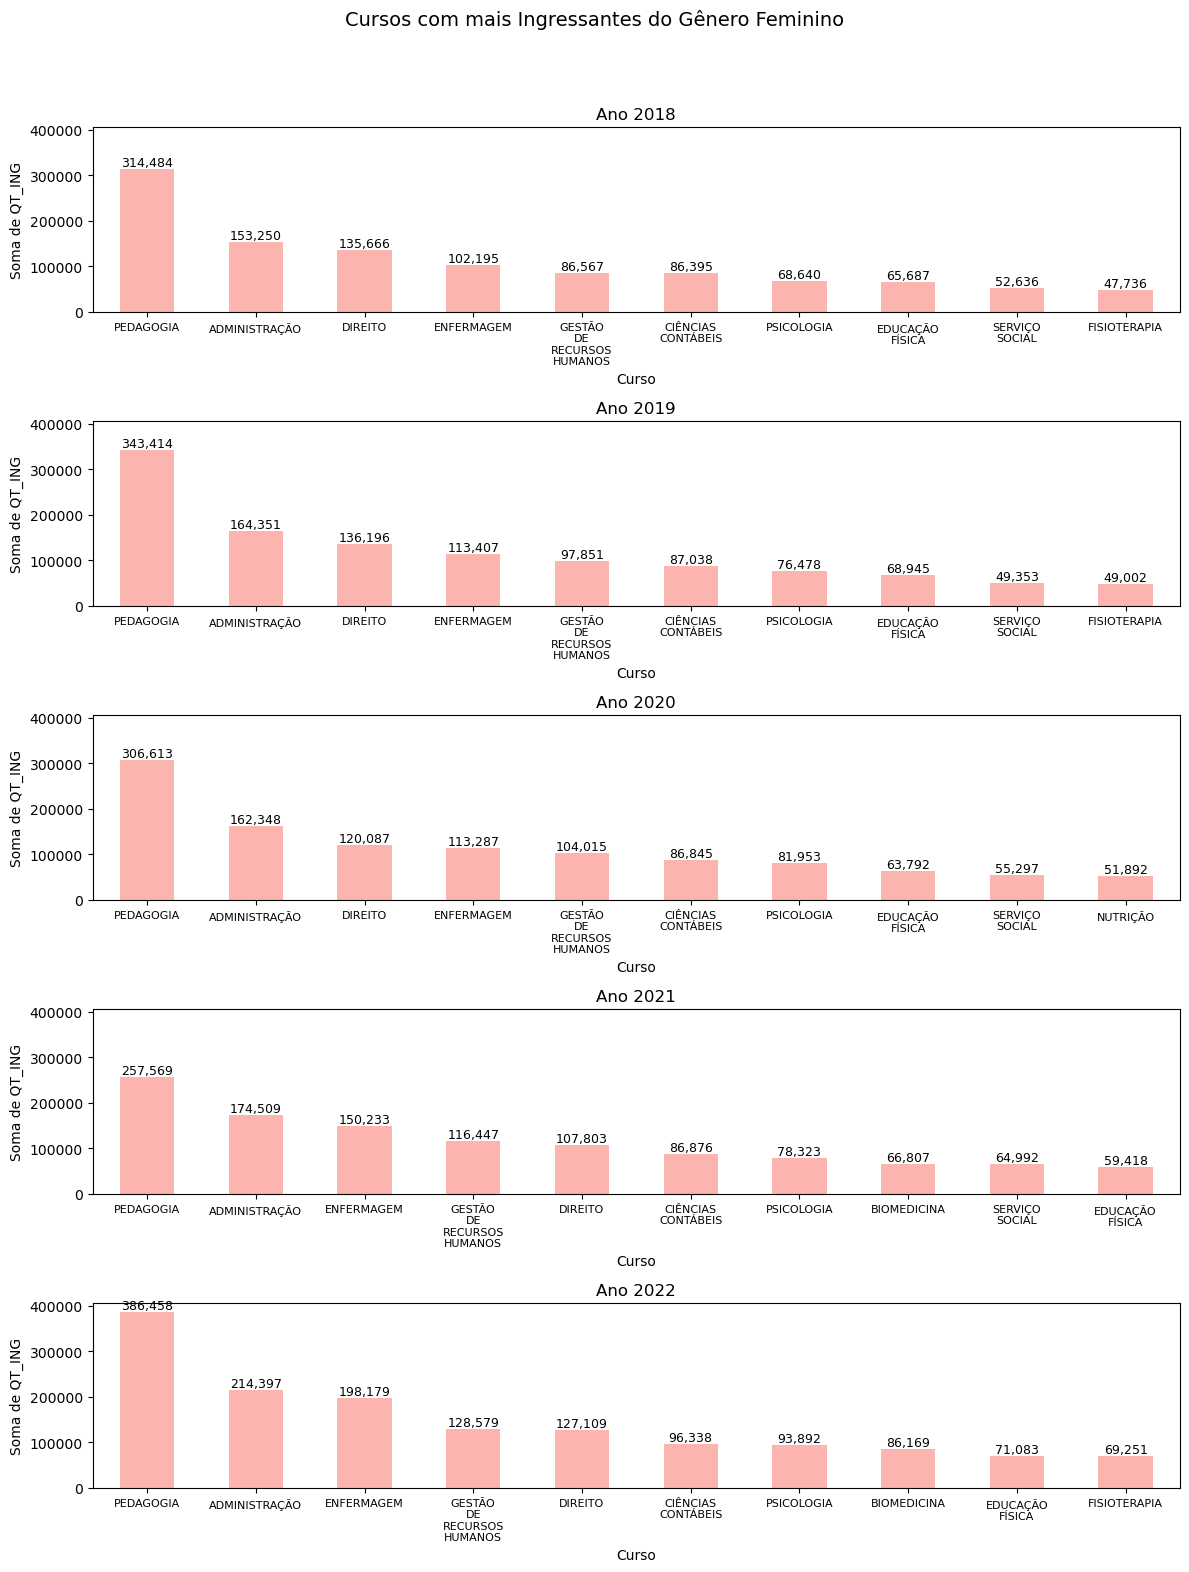

In [71]:

# Agrupar os dados e somar 'QT_ING' por 'NO_CURSO' e 'NU_ANO_CENSO'
dados_agrupados_fem = df_mvp.pivot_table(values='QT_ING_FEM', 
                                           index='NO_CURSO', 
                                           columns='NU_ANO_CENSO', 
                                           aggfunc='sum')

anos = [2018, 2019, 2020, 2021, 2022]

# Criar subplots com 5 linhas, uma para cada ano
fig, axes = plt.subplots(nrows=len(anos), ncols=1, figsize=(12, 16), sharey=True)

# Definir cores para diferentes dimensões
sns.set_palette("Pastel1")

# Função auxiliar para plotar os gráficos em cada eixo
def plot_por_ano(ano, ax):
    # Selecionar as colunas correspondentes ao ano específico
    dados_por_ano = dados_agrupados_fem[ano]

    # Filtrar os 10 maiores cursos
    top_10 = dados_por_ano.nlargest(10)

    # Plotar gráfico de barras empilhadas
    bars = top_10.plot(kind='bar', stacked=True, ax=ax)

    # Configurações de título e eixos
    ax.set_title(f'Ano {ano}', fontsize=12)
    ax.set_xlabel('Curso', fontsize=10)
    ax.set_ylabel('Soma de QT_ING', fontsize=10)
    ax.tick_params(axis='x', labelsize=8)  # Diminuir a fonte do eixo X

    # Ajustar os rótulos do eixo X para quebrar em linhas
    ax.set_xticklabels([label.replace(' ', '\n') for label in top_10.index], rotation=0)

    # Adicionar rótulos de dados nas barras
    for p in bars.patches:
        height = p.get_height()
        if height > 0:  # Apenas adicionar rótulo se houver um valor a ser mostrado
            ax.annotate(f'{int(height):,}', 
                        (p.get_x() + p.get_width() / 2., height),  # Colocar no topo da barra
                        ha='center', va='bottom', 
                        fontsize=9, color='black')

# Plotar os gráficos para cada ano
for i, ano in enumerate(anos):
    plot_por_ano(ano, axes[i])

# Adicionar título geral
fig.suptitle('Cursos com mais Ingressantes do Gênero Feminino', fontsize=14)

# Ajustar layout para evitar sobreposição de rótulos
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


É possível observar que não há uma grande variação entre a escolha dos cursos nos cinco anos analisados, sendo pedagogia a principal escolha.

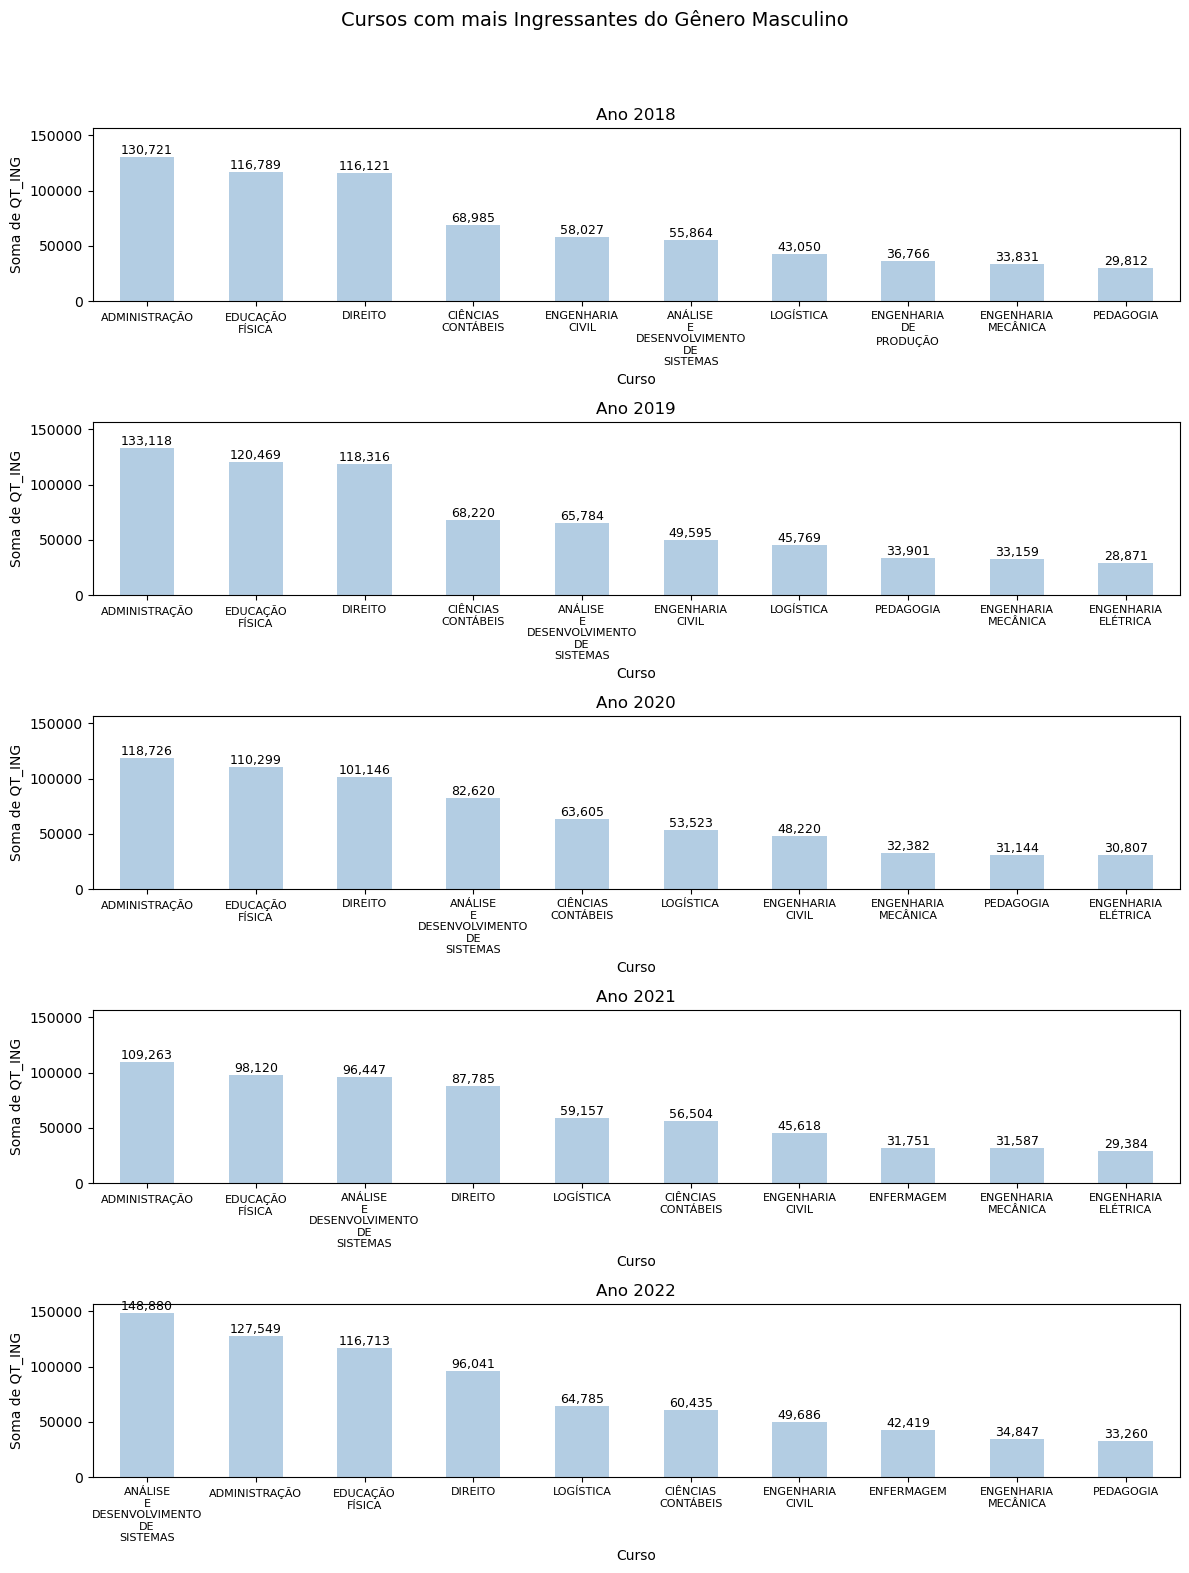

In [72]:
# Agrupar os dados e somar 'QT_ING_MASC' por 'NO_CURSO' e 'NU_ANO_CENSO'
dados_agrupados_masc = df_mvp.pivot_table(values='QT_ING_MASC', 
                                           index='NO_CURSO', 
                                           columns='NU_ANO_CENSO', 
                                           aggfunc='sum')

# Definir os anos que queremos plotar
anos = [2018, 2019, 2020, 2021, 2022]

# Criar subplots com 5 linhas, uma para cada ano
fig, axes = plt.subplots(nrows=len(anos), ncols=1, figsize=(12, 16), sharey=True)

# Definir cores para diferentes dimensões
cores = sns.color_palette("Pastel1")
cores = [cores[1]]  # Usar apenas a segunda cor da paleta

# Função auxiliar para plotar os gráficos em cada eixo
def plot_por_ano(ano, ax):
    # Selecionar as colunas correspondentes ao ano específico
    dados_por_ano = dados_agrupados_masc[ano]
    
    # Filtrar os 10 maiores cursos
    top_10 = dados_por_ano.nlargest(10)

    # Plotar gráfico de barras
    bars = top_10.plot(kind='bar', color=cores, ax=ax)  # Usar a cor definida

    # Configurações de título e eixos
    ax.set_title(f'Ano {ano}', fontsize=12)
    ax.set_xlabel('Curso', fontsize=10)
    ax.set_ylabel('Soma de QT_ING', fontsize=10)
    ax.tick_params(axis='x', labelsize=8)  # Diminuir a fonte do eixo X

    # Ajustar os rótulos do eixo X para quebrar em linhas
    ax.set_xticklabels([label.replace(' ', '\n') for label in top_10.index], rotation=0)

    # Adicionar rótulos de dados nas barras
    for p in bars.patches:
        height = p.get_height()
        if height > 0:  # Apenas adicionar rótulo se houver um valor a ser mostrado
            ax.annotate(f'{int(height):,}', 
                        (p.get_x() + p.get_width() / 2., height),  # Colocar no topo da barra
                        ha='center', va='bottom', 
                        fontsize=9, color='black')

# Plotar os gráficos para cada ano
for i, ano in enumerate(anos):
    plot_por_ano(ano, axes[i])

# Adicionar título geral
fig.suptitle('Cursos com mais Ingressantes do Gênero Masculino', fontsize=14)

# Ajustar layout para evitar sobreposição de rótulos
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Já para os ingressantes do gênero masculino, pode-se notar o crescimento da quantidade de ingressantes no curso de Análise e Desenvolvimento de Sistemas, com um crescimento de 167% de quantidade de alunos ingressantes. Além disso, conseguimos notar alguns cursos, como a Engenharia de Produção, deixando de ser uma das principais escolhas.

Por fim, conclui-se que a pandemia de fato impactou os modelos conhecidos de esnsino superior. É muito notável o crescimento de alunos ingressantes a partir da pandemia no modelo digital, uma vez que a universidade a distância possibilita a conciliação da graduação com outras atividades. Além disso, principalmente para os ingressantes do gênero masculino, é possível notar a preferência para cursos mais voltados para a era digital, como a Análise e Desenvolvimento de Sistemas. 
Em contrapartida, apesar do modelo de ensino a distância possibilitar que mais pessoas tenham acesso a educação superior, a maior concentração de ingressantes se mantém em quase 50% em todos os anos na região sudeste, o que também pode ser justificado pela maior concentração populacional na região. 